#TABLE OF CONTENTS
#1.Loading librarys

#2.Reading the Dataset

#3.Data analysis

#4.Exploratory Data Analysis
   * Finding Null values in data set
   * Drop function

#5.Data visualization

   * Barplots
   * Pie plot

#6.multivariate analysis

   * Pair plots
   * Heatmaps
   * Box plots

#7.Encoding

   * Label encoding

#8.Feature Scaling

   * Standard Scaler

#9.Data spliting

   * spliting
   * Smote

#10.Algorithm

   * Random Forest

#11.classification models

   * Confusion matrix
   * classification report
   * fscores
   * Bar plot

#12.K-Nearest Neighbors (KNN)

#13.Additional Algorithm's

   * LogisticRegression
   * DecisionTreeClassifier
   * GaussianNB
   * SVM

#14.Feature Importance

   * Accuracy Score

#15.Cross Validation      

#1.LOADING LIBRARIES



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# import plotly.express as px
# import plotly.figure_factory as ff
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score

#2.READING THE DATASET

In [ ]:
df=pd.read_csv('/content/blood_samples_dataset_test.csv')
df

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038,Diabetes
482,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.261767,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804,Heart Di
483,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874,Anemia
484,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526,Diabetes


# 3.DATA ANALYSIS


In [ ]:
df.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di


In [ ]:
df.Disease.value_counts()

Diabetes    294
Anemia       84
Thalasse     48
Heart Di     39
Thromboc     16
Healthy       5
Name: Disease, dtype: int64

In [ ]:
df.tail()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
481,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038,Diabetes
482,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.261767,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804,Heart Di
483,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874,Anemia
484,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526,Diabetes
485,0.877912,0.597809,0.730440,0.462307,0.498438,0.792822,0.976056,0.883937,0.202147,0.930649,...,0.242163,0.783372,0.568568,0.784730,0.500928,0.016738,0.104687,0.055181,0.049341,Diabetes


In [ ]:
df.columns

Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

In [ ]:
 df1=df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    486 non-null    float64
 1   Cholesterol                                486 non-null    float64
 2   Hemoglobin                                 486 non-null    float64
 3   Platelets                                  486 non-null    float64
 4   White Blood Cells                          486 non-null    float64
 5   Red Blood Cells                            486 non-null    float64
 6   Hematocrit                                 486 non-null    float64
 7   Mean Corpuscular Volume                    486 non-null    float64
 8   Mean Corpuscular Hemoglobin                486 non-null    float64
 9   Mean Corpuscular Hemoglobin Concentration  486 non-null    float64
 10  Insulin                   

In [ ]:
df.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,...,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,0.490044,0.506797,0.485502,0.528136,0.509783,0.504347,0.501042,0.516185,0.510145,0.501105,...,0.498538,0.489365,0.501706,0.487933,0.500615,0.499675,0.493794,0.515541,0.510077,0.517365
std,0.284196,0.282871,0.298818,0.292610,0.290887,0.302865,0.294501,0.279954,0.285213,0.290614,...,0.288848,0.290849,0.286729,0.292726,0.285374,0.301451,0.292400,0.287223,0.294011,0.291645
min,0.001827,0.003088,0.000719,0.000006,-0.000206,0.000552,0.004556,0.000309,-0.000614,0.000719,...,0.001885,-0.000991,0.001036,-0.000546,-0.000312,0.002047,0.002145,0.008831,0.005714,-0.000991
25%,0.236664,0.268021,0.201994,0.276155,0.264944,0.218573,0.246255,0.287755,0.259967,0.255839,...,0.238772,0.239302,0.262516,0.229095,0.251076,0.239369,0.228581,0.262924,0.267101,0.263192
50%,0.496471,0.502397,0.477706,0.538642,0.511102,0.518103,0.496275,0.533319,0.498332,0.493929,...,0.503164,0.481549,0.511373,0.481533,0.515321,0.497846,0.507581,0.526299,0.508479,0.546542
75%,0.727144,0.754638,0.750028,0.789486,0.767896,0.768466,0.761107,0.746765,0.761956,0.734817,...,0.749527,0.725472,0.756136,0.741867,0.739248,0.775458,0.751124,0.777839,0.781128,0.776940
max,0.991742,0.999606,0.997876,0.999507,0.999646,0.997267,1.000857,0.996362,0.999234,0.999666,...,0.999826,0.999265,0.999567,1.000744,1.000326,1.000402,0.999857,0.999348,1.000125,0.999488


In [ ]:
df.sample()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
310,0.130864,0.752782,0.86528,0.015304,0.837623,0.967032,0.749199,0.519999,0.924955,0.965581,...,0.749431,0.400853,0.309088,0.948134,0.180094,0.109859,0.279758,0.65641,0.201929,Thalasse


In [ ]:
df.dtypes

Glucose                                      float64
Cholesterol                                  float64
Hemoglobin                                   float64
Platelets                                    float64
White Blood Cells                            float64
Red Blood Cells                              float64
Hematocrit                                   float64
Mean Corpuscular Volume                      float64
Mean Corpuscular Hemoglobin                  float64
Mean Corpuscular Hemoglobin Concentration    float64
Insulin                                      float64
BMI                                          float64
Systolic Blood Pressure                      float64
Diastolic Blood Pressure                     float64
Triglycerides                                float64
HbA1c                                        float64
LDL Cholesterol                              float64
HDL Cholesterol                              float64
ALT                                          f

# 4.EDA (Exploratory Data Analysis)

In [ ]:
df.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

**NOTE:** There are no null values present in the columns

In [ ]:
# duplicate values
duplicate_rows = df[df.duplicated()].sum()
duplicate_rows


Glucose                                      0.0
Cholesterol                                  0.0
Hemoglobin                                   0.0
Platelets                                    0.0
White Blood Cells                            0.0
Red Blood Cells                              0.0
Hematocrit                                   0.0
Mean Corpuscular Volume                      0.0
Mean Corpuscular Hemoglobin                  0.0
Mean Corpuscular Hemoglobin Concentration    0.0
Insulin                                      0.0
BMI                                          0.0
Systolic Blood Pressure                      0.0
Diastolic Blood Pressure                     0.0
Triglycerides                                0.0
HbA1c                                        0.0
LDL Cholesterol                              0.0
HDL Cholesterol                              0.0
ALT                                          0.0
AST                                          0.0
Heart Rate          

**NOTE**: There are no duplicate values .

#5.DATA VISUALIZATION

#BARPLOT
* A bar plot is a graphical representation of categorical data using rectangular bars whose lengths are proportional to the values they represent. The purpose of a bar plot is to visualize the distribution, comparison, or relationship between different categories or groups within a dataset. It provides a clear and concise way to display data

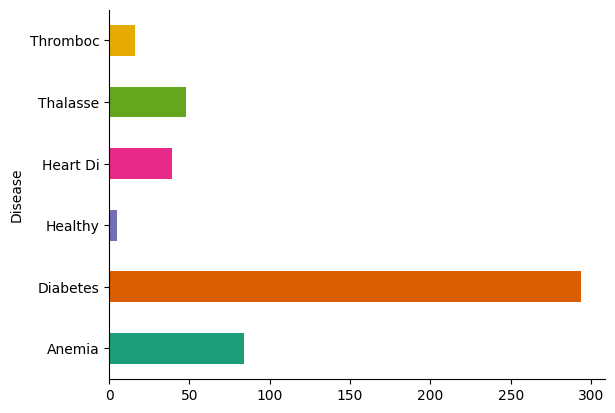

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Disease').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**NOTE**:compared to all diseases diabetes patients are more.

#PIE CHART
* pie chart is to visually represent the distribution of categorical data as proportions or percentages of a whole. It provides a clear and intuitive way to understand the relative sizes of different categories within a dataset, making it easier to identify patterns, trends, or disparities.
* Pie charts are especially useful for displaying data with a small number of categories and are commonly used in presentations, reports, and data visualization to communicate information effectively to a broad audience.

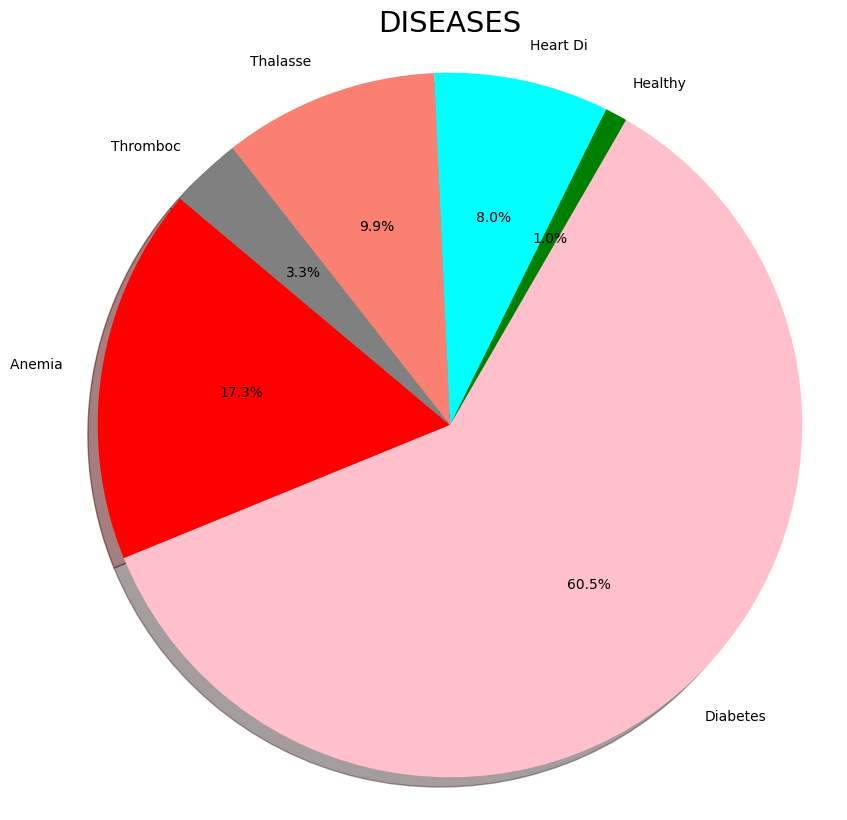

In [ ]:
plt.figure(figsize=(10, 10))
ct = pd.value_counts(df['Disease'].values, sort=False)
labels = ['Diabetes','Thalasse ','Heart Di','Thromboc','Healthy','Anemia ']
labels.sort()
sizes = ct
ct.sort_index(inplace=True)
colors = ['Red', 'pink', 'green', 'cyan','salmon','grey']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('DISEASES').set_fontsize(21)
plt.axis('equal')
plt.show()

**NOTE**:According to pie chart the percentage of diabetes is high compared to all other diseases.

#6.MULTIVARIATE ANALYSIS

#HEATMAP
* **Visualizing relationships in tabular data**: Heatmaps are particularly useful for visualizing relationships in tabular data by representing each cell's value with a color. This allows us to quickly identify patterns, trends, and relationships within the data.

* **Correlation analysis**: Heatmaps are commonly used to visualize correlation matrices, where each cell represents the correlation coefficient between two variables. By using a color scale to represent the strength and direction of correlations, heatmaps make it easy to identify strong, weak, positive, and negative correlations.

<Axes: >

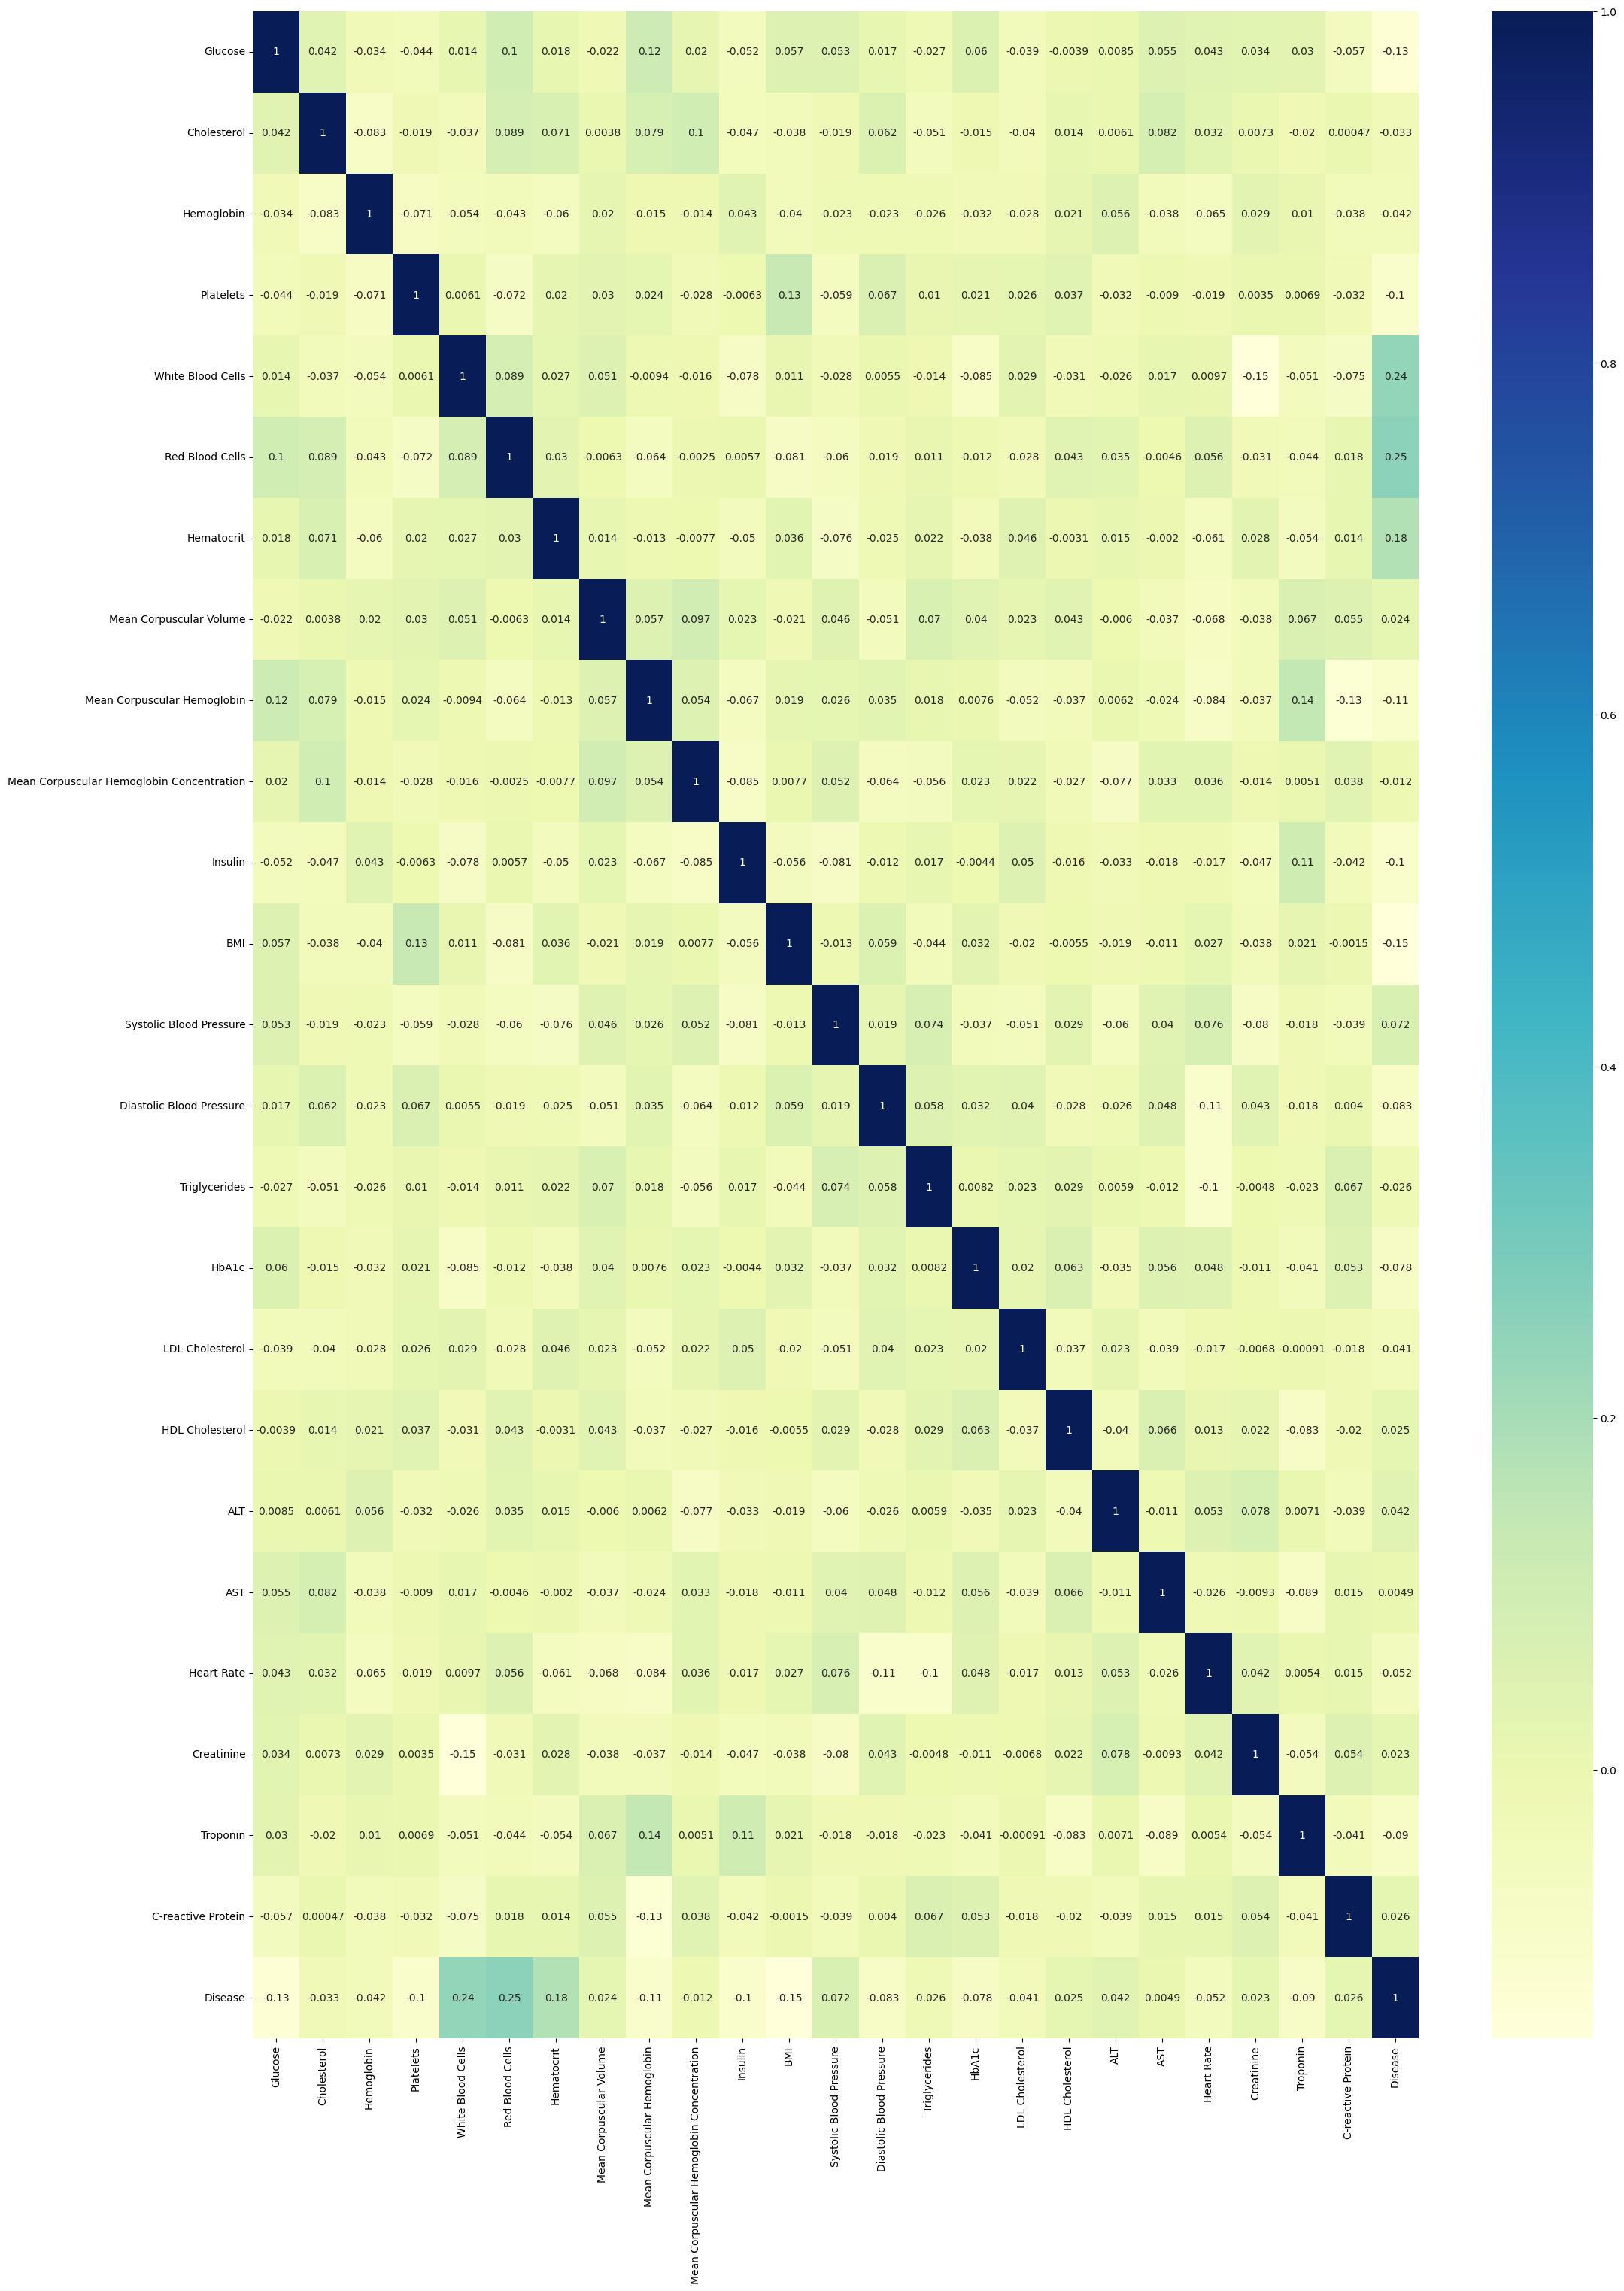

In [ ]:
plt.figure(figsize=(25,35))
sns.heatmap(df.corr(),annot=True ,cmap="YlGnBu")

# BOX PLOT
* **Visualizing distribution**: Box plots provide a visual summary of the distribution of a continuous variable, including its central tendency, spread, and shape. The box in the plot represents the interquartile range (IQR), which contains the middle 50% of the data, while the whiskers extend to the minimum and maximum values within a certain range or are defined using statistical criteria.

* **Detecting skewness and outliers**: Box plots help identify skewness and outliers in the data. Skewness is evident if the median line is not centered within the box, while outliers are represented as individual data points beyond the whiskers of the plot. Outliers are important to identify as they can significantly affect statistical analyses and model performance.

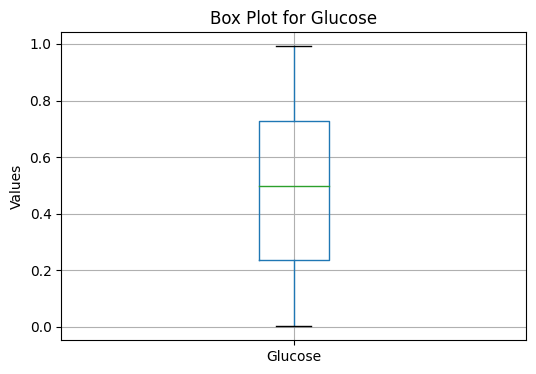

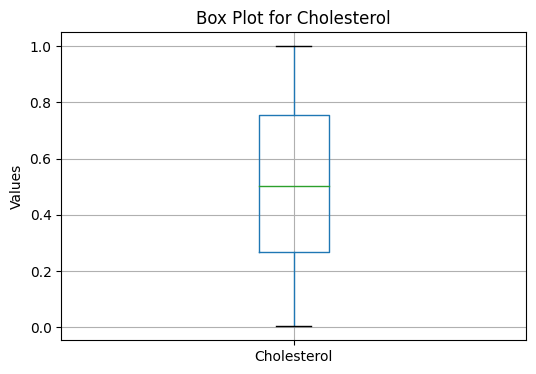

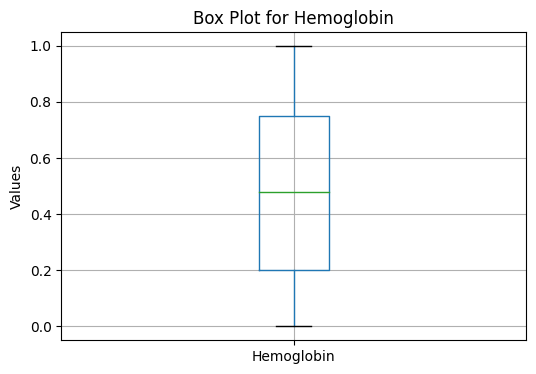

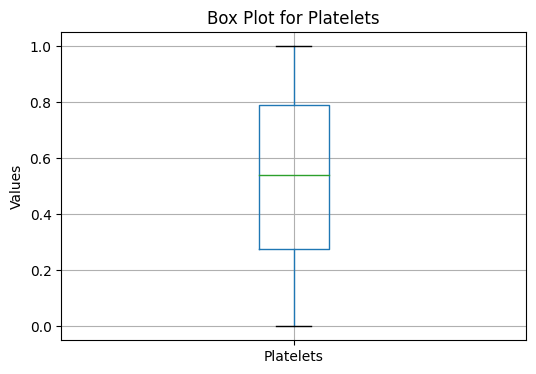

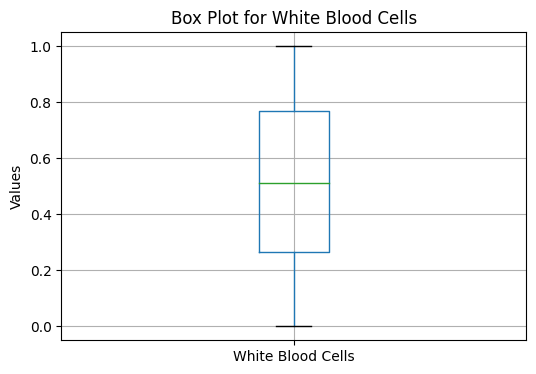

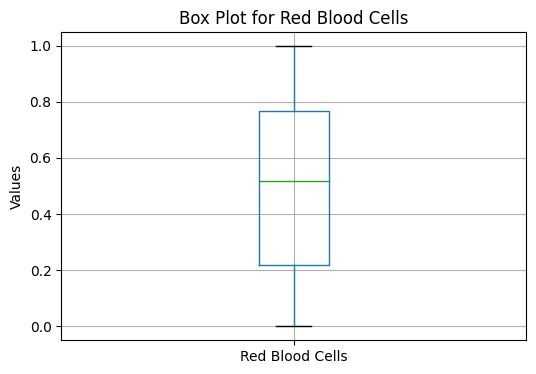

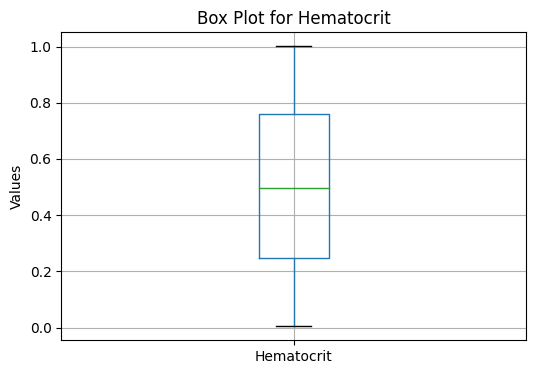

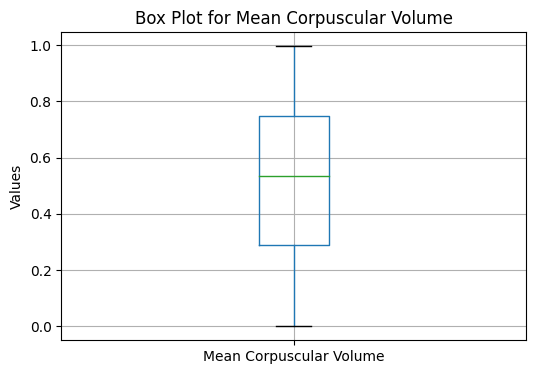

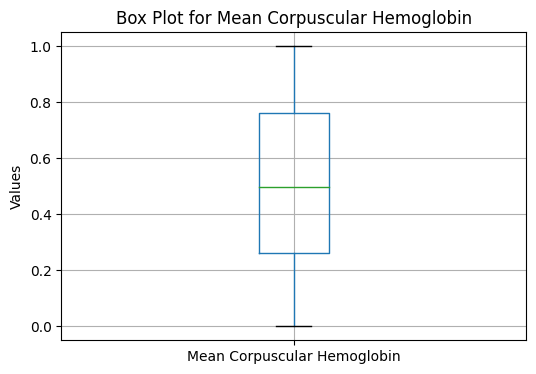

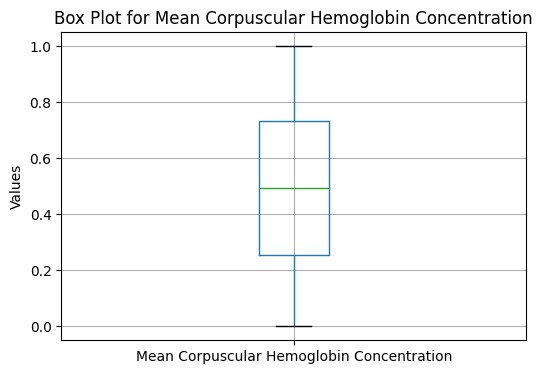

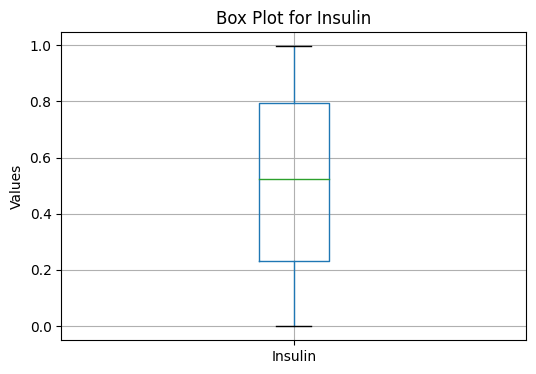

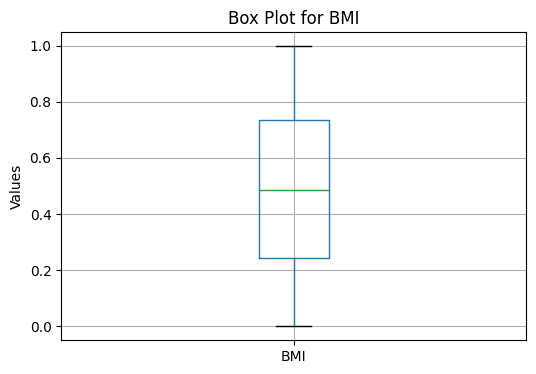

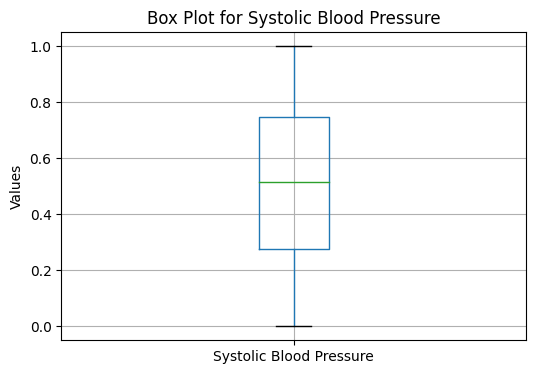

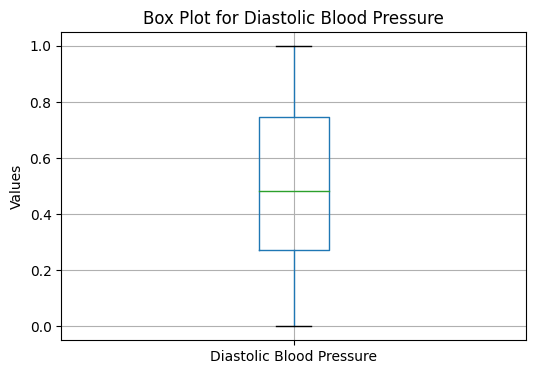

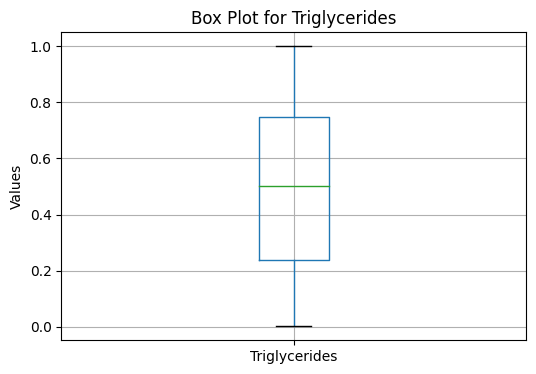

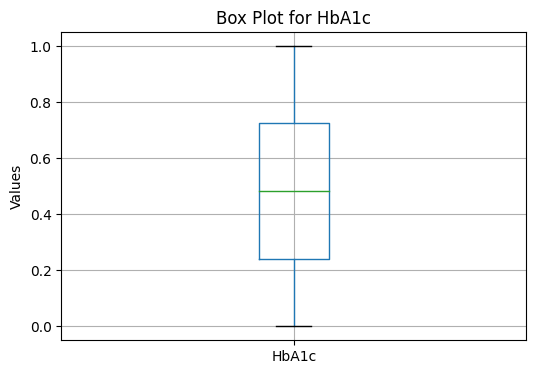

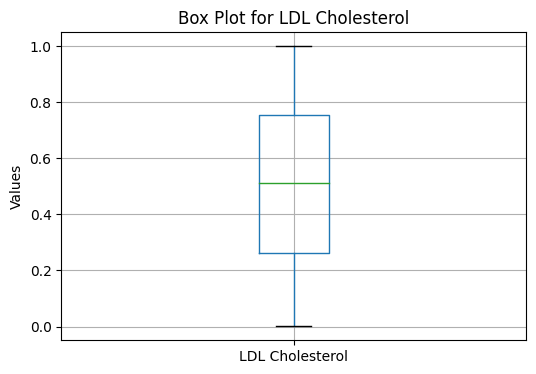

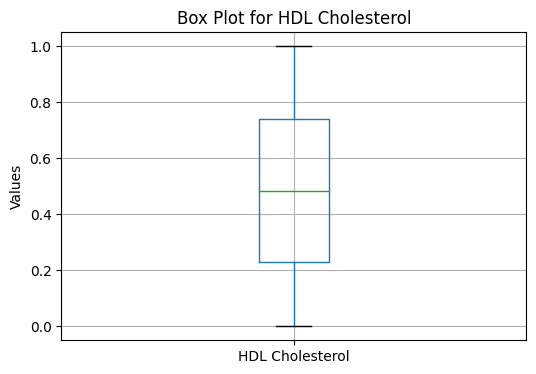

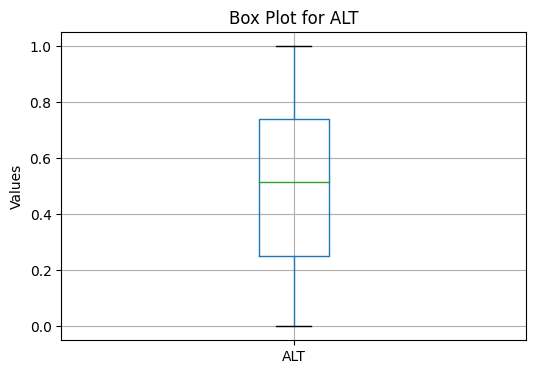

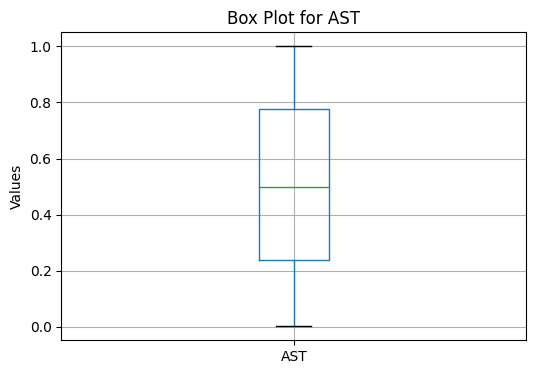

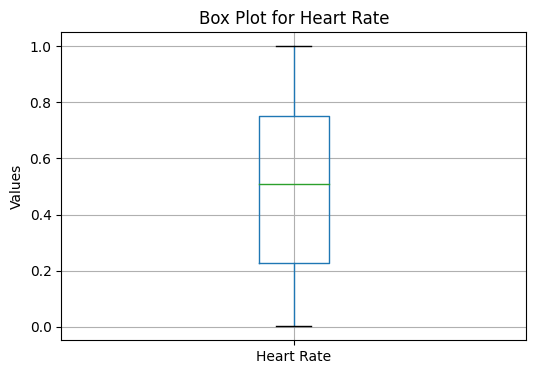

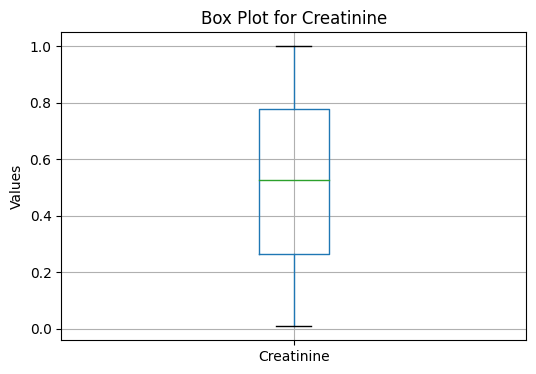

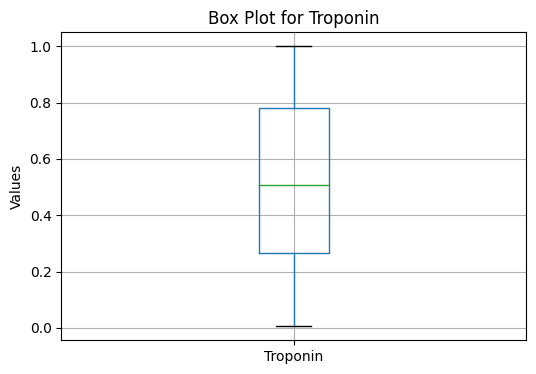

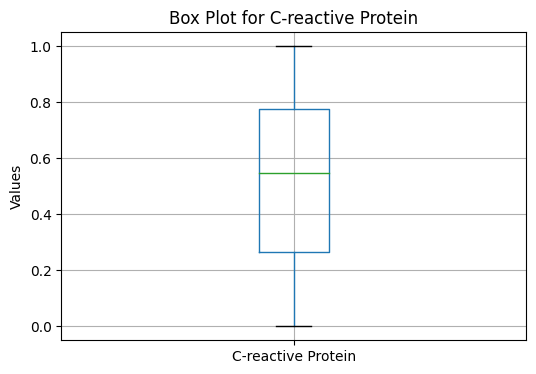

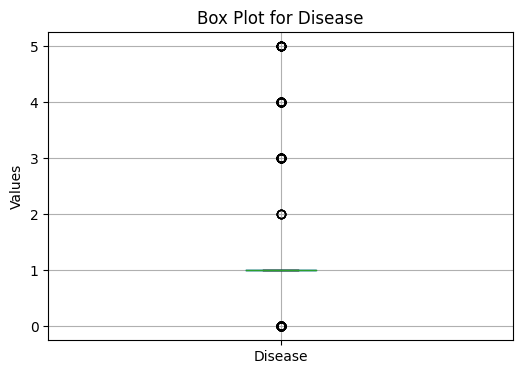

In [ ]:
for column in df.columns:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=[column])
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Values')
    plt.show()

# PAIRPLOT
* A pair plot, also known as a scatterplot matrix, is a graphical tool used in data analysis to visualize the pairwise relationships between different variables in a dataset.

In [ ]:
sns.pairplot(df,hue='Disease')
plt.show()

#7.ENCODING

#LABEL ENCODING FOR CATEGORICAL COLUMNS
* label encoding is to convert categorical data into numerical format, assigning a unique numerical label to each category. This transformation enables machine learning algorithms to process categorical features, as they typically require numerical inputs.
* Label encoding is particularly useful for algorithms that can interpret ordinal relationships between categories, as it preserves the order of the labels. It also simplifies data preprocessing and reduces memory usage compared to other encoding techniques like one-hot encoding.








In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'target_column' is the name of the target column in your dataset
label_encoder = LabelEncoder()

# Convert the 'Disease' column to numerical values
df['Disease'] = df['Disease'].astype('category')

# Fit the encoder to the target column
label_encoder.fit(df['Disease'])

# Transform the target column using the fitted encoder
df['Disease'] = label_encoder.transform(df['Disease'])


**NOTE**:Label Encoder is used to Convert the 'Disease' column to numerical values

#8.FEATURE SCALING
 **standard scaling**:
* **Normalize Data**: StandardScaler transforms features to have a mean of zero and a standard deviation of one, standardizing the scale across all features.
* **Enhance Algorithm Performance**: Standardized features improve the performance of machine learning algorithms, particularly those sensitive to variations in feature scales.
* **Facilitate Interpretability**: Standardization makes features easier to interpret as they are expressed in terms of standard deviations from the mean.
* **Ensure Algorithm Compatibility**: Many algorithms assume standardized features, making StandardScaler crucial for compatibility and convergence.



In [ ]:
#Standard Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(df.values.reshape(-1, 1))
X_test = scaler.transform(df.values.reshape(-1, 1))


#9.SPLITTING THE DATA
* The train_test_split function from scikit-learn is used to split a dataset into two subsets: one for training a machine learning model (x_train and y_train) and one for evaluating its performance (X_test and y_test)

* **Evaluation of model performance**: By splitting the dataset into training and testing subsets, we can evaluate the performance of the trained model on unseen data. The testing subset (X_test and y_test) serves as a proxy for real-world data, allowing us to assess the model's generalization ability and detect overfitting.

In [ ]:
X = df.drop('Disease', axis=1)
y = df['Disease']

**SMOTE FUNCTION**
 * The Synthetic Minority Over-sampling Technique (SMOTE) function is used to address class imbalance in datasets by generating synthetic samples for the minority class, thereby improving the classifier's performance by providing a more balanced training set.

In [ ]:
 #Set the number of nearest neighbors to a value less than or equal to the number of samples
smote = SMOTE(k_neighbors=4)

# Resample the data using SMOTE
X, y = smote.fit_resample(X, y)


In [ ]:
y.value_counts()

4    294
1    294
3    294
0    294
5    294
2    294
Name: Disease, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#10.ALGORITHMS

#RANDOM FOREST
* **High predictive accuracy**: Random Forest typically provides high predictive accuracy compared to many other algorithms. It works well with both categorical and numerical data and is less prone to overfitting, making it a popular choice for various predictive modeling tasks.

* **Ensemble learning**: Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. Each decision tree is trained on a random subset of the training data and features, and predictions are made by aggregating the predictions of individual trees



In [ ]:
X_train_rfc = X_train.drop(columns = ['AST','Creatinine','LDL Cholesterol','Heart Rate'])

In [ ]:
X_test_rfc = X_test.drop(columns = ['AST','Creatinine','LDL Cholesterol','Heart Rate'])

* NOTE: according  to the importance of the columns we dropped the four columns which are listed below:

In [ ]:
#Random forest code
RFclassifier = RandomForestClassifier(n_estimators=1000,max_leaf_nodes=21)
RFclassifier.fit(X_train_rfc, y_train)

y_test_pred_rf = RFclassifier.predict(X_test_rfc)
y_train_pred_rf=RFclassifier.predict(X_train_rfc)

train_accuracy_rf=accuracy_score(y_train_pred_rf,y_train)
test_accuracy_rf=accuracy_score(y_test_pred_rf,y_test)

print(confusion_matrix(y_test,y_test_pred_rf))
print('training accuracy',accuracy_score(y_train,y_train_pred_rf))
print('testing accuracy',accuracy_score(y_test,y_test_pred_rf))
#print('training precion',precision_score(y_train,y_train_pred_rf))
#print('training precion',precision_score(y_test,y_test_pred_rf))

[[64  2  0  2  0  4]
 [ 0 52  0  0  0  2]
 [ 0  0 51  0  0  0]
 [ 0  0  0 68  0  0]
 [ 0  0  1  3 48  1]
 [ 0  0  0  0  0 55]]
training accuracy 0.9744861800141743
testing accuracy 0.9575070821529745


#11.CLASSIFICATION MODELS

In [ ]:
# Create the feature importances Series
fscores = pd.Series(RFclassifier.feature_importances_, index=X_train_rfc.columns).sort_values(ascending=False)
fscores

Platelets                                    0.205198
Mean Corpuscular Volume                      0.112205
Cholesterol                                  0.068905
White Blood Cells                            0.066506
Insulin                                      0.065997
Red Blood Cells                              0.062968
Hematocrit                                   0.056266
Systolic Blood Pressure                      0.048018
Mean Corpuscular Hemoglobin Concentration    0.045776
Glucose                                      0.043184
HDL Cholesterol                              0.040324
BMI                                          0.035930
Mean Corpuscular Hemoglobin                  0.035419
Diastolic Blood Pressure                     0.023751
Triglycerides                                0.023390
HbA1c                                        0.022758
C-reactive Protein                           0.014480
Hemoglobin                                   0.011501
ALT                         

# FEATURE IMPORTANCE(after dropping the columns)

In [ ]:
#Using fscores finding the important column and plot using barplot
import plotly.express as px
fig = px.bar(fscores, x=fscores.values, y=fscores.index, orientation='h',
             title='Feature Importances', labels={'y': 'Feature', 'x': 'Importance'})

fig.show()

In [ ]:
# classification Report
cr1=classification_report(y_test,y_test_pred_rf)
print(cr1)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        72
           1       0.96      0.96      0.96        54
           2       0.98      1.00      0.99        51
           3       0.93      1.00      0.96        68
           4       1.00      0.91      0.95        53
           5       0.89      1.00      0.94        55

    accuracy                           0.96       353
   macro avg       0.96      0.96      0.96       353
weighted avg       0.96      0.96      0.96       353



#12.KNN(K-Nearest Neighbour)

In [ ]:
# Knn code
from sklearn.neighbors import KNeighborsClassifier
knnclassifier=KNeighborsClassifier(n_neighbors=15,metric='minkowski')
knnclassifier.fit(X_train,y_train)

y_train_pred_knn=knnclassifier.predict(X_train)
y_test_pred_knn=knnclassifier.predict(X_test)

train_accuracy_knn=accuracy_score(y_train_pred_knn,y_train)
test_accuracy_knn=accuracy_score(y_test_pred_knn,y_test)

print('Training accuracy(knn): {:.2f}%'.format(train_accuracy_knn*100))
print('Testing accuracy(knn): {:.2f}%'.format(test_accuracy_knn*100))

print("\nConfusion Matrix (Testing Set):")
print(confusion_matrix(y_test, y_test_pred_knn))

Training accuracy(knn): 79.59%
Testing accuracy(knn): 77.90%

Confusion Matrix (Testing Set):
[[55  1  1  7  3  5]
 [11  0 14 17  8  4]
 [ 0  0 51  0  0  0]
 [ 0  0  2 62  3  1]
 [ 0  0  1  0 52  0]
 [ 0  0  0  0  0 55]]


In [ ]:
# classification Report
cr2=classification_report(y_test,y_pred)
print(cr2)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        72
           1       0.81      0.65      0.72        54
           2       1.00      1.00      1.00        51
           3       0.97      0.97      0.97        68
           4       0.85      0.98      0.91        53
           5       1.00      1.00      1.00        55

    accuracy                           0.92       353
   macro avg       0.92      0.91      0.91       353
weighted avg       0.91      0.92      0.91       353



#13.ADDITIONAL ALGORITHMS

#DECISION TREE
>
* Decision trees are easy to understand and interpret, making them valuable for gaining insights into the decision-making process of the model. The decision rules learned by the tree can be visualized, allowing users to comprehend how the model arrives at predictions.






In [ ]:
# Decision tree code
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

train_pred=dt_model.predict(X_train)
y_pred = dt_model.predict(X_test)

train_accuracy_dt=accuracy_score(train_pred,y_train)
test_accuracy_dt=accuracy_score(y_pred,y_test)

print(confusion_matrix(y_test,y_pred))
print('training accuracy',accuracy_score(y_train,train_pred))
print('testing accuracy',accuracy_score(y_test,y_pred))


[[64  6  0  0  2  0]
 [10 35  0  2  7  0]
 [ 0  0 51  0  0  0]
 [ 1  1  0 66  0  0]
 [ 0  1  0  0 52  0]
 [ 0  0  0  0  0 55]]
training accuracy 1.0
testing accuracy 0.9150141643059491


In [ ]:
# classification Report
cr3=classification_report(y_test,y_pred)
print(cr3)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        72
           1       0.81      0.65      0.72        54
           2       1.00      1.00      1.00        51
           3       0.97      0.97      0.97        68
           4       0.85      0.98      0.91        53
           5       1.00      1.00      1.00        55

    accuracy                           0.92       353
   macro avg       0.92      0.91      0.91       353
weighted avg       0.91      0.92      0.91       353



#LOGISTIC REGRESSION



* Logistic Regression is a powerful and versatile tool for binary
  classification tasks, particularly when interpretability, speed, and efficiency are important considerations. However, it's essential to note that Logistic Regression has limitations, such as its inability to capture complex nonlinear relationships in the data, which may require more sophisticated models for certain tasks.







In [ ]:
# Logistic regression code
from sklearn.linear_model import LogisticRegression

LogRegClassifier = LogisticRegression(max_iter=500)
LogRegClassifier.fit(X_train, y_train)

y_train_pred_logreg = LogRegClassifier.predict(X_train)
y_test_pred_logreg = LogRegClassifier.predict(X_test)


train_accuracy_logreg = accuracy_score(y_train_pred_logreg, y_train)
train_f1_score_logreg = f1_score(y_train, y_train_pred_logreg, average='weighted')
test_accuracy_logreg = accuracy_score(y_test_pred_logreg, y_test)
test_f1_score_logreg = f1_score(y_test, y_test_pred_logreg, average='weighted')


print('Training Accuracy (Logistic Regression): {:.2f}%'.format(train_accuracy_logreg * 100))
print('Testing Accuracy (Logistic Regression): {:.2f}%'.format(test_accuracy_logreg * 100))
print('Training F1 Score (Logistic Regression): {:.2f}'.format(train_f1_score_logreg*100))
print('Testing F1 Score (Logistic Regression): {:.2f}'.format(test_f1_score_logreg*100))


print("\nConfusion Matrix (Testing Set):")
print(confusion_matrix(y_test, y_test_pred_logreg))

Training Accuracy (Logistic Regression): 81.29%
Testing Accuracy (Logistic Regression): 80.74%
Training F1 Score (Logistic Regression): 81.00
Testing F1 Score (Logistic Regression): 80.24

Confusion Matrix (Testing Set):
[[51 11  0  5  4  1]
 [ 9 28  4  7  4  2]
 [ 0  0 51  0  0  0]
 [ 4  6  1 54  3  0]
 [ 2  2  0  3 46  0]
 [ 0  0  0  0  0 55]]


In [ ]:
# classification Report
cr4=classification_report(y_test,y_pred)
print(cr4)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        72
           1       0.81      0.65      0.72        54
           2       1.00      1.00      1.00        51
           3       0.97      0.97      0.97        68
           4       0.85      0.98      0.91        53
           5       1.00      1.00      1.00        55

    accuracy                           0.92       353
   macro avg       0.92      0.91      0.91       353
weighted avg       0.91      0.92      0.91       353



# NAIVE BAYES

* Gaussian Naive Bayes (GaussianNB) is a variant of the Naive Bayes algorithm

* **Simplicity**: GaussianNB is a simple and easy-to-understand classification algorithm. It's straightforward to implement, making it a good choice for quick
prototyping or as a baseline model.

* **Efficiency**: GaussianNB is computationally efficient, making it suitable for large datasets. It scales well with the number of features and samples, and the time complexity for training and prediction is linear with respect to the number of features and samples.




In [ ]:
# naive bayes code
from sklearn.naive_bayes import GaussianNB
Naiveclassifier=GaussianNB()
Naiveclassifier.fit(X_train,y_train)

y_train_pred_Naive=Naiveclassifier.predict(X_train)
y_test_pred_Naive=Naiveclassifier.predict(X_test)

train_accuracy_Naive=accuracy_score(y_train_pred_Naive,y_train)
test_accuracy_Naive=accuracy_score(y_test_pred_Naive,y_test)

print('Training accuracy(Naive Bayes): {:.2f}%'.format(train_accuracy_Naive*100))
print('Testing accuracy(Naive Bayes): {:.2f}%'.format(test_accuracy_Naive*100))

print("\nConfusion Matrix (Testing Set):")
print(confusion_matrix(y_test, y_test_pred_Naive))

Training accuracy(Naive Bayes): 88.94%
Testing accuracy(Naive Bayes): 88.95%

Confusion Matrix (Testing Set):
[[53 14  0  3  0  2]
 [ 0 51  0  1  2  0]
 [ 0  0 51  0  0  0]
 [ 2  3  0 60  3  0]
 [ 5  2  0  2 44  0]
 [ 0  0  0  0  0 55]]


In [ ]:
# classification Report
cr5=classification_report(y_test,y_pred)
print(cr5)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        72
           1       0.81      0.65      0.72        54
           2       1.00      1.00      1.00        51
           3       0.97      0.97      0.97        68
           4       0.85      0.98      0.91        53
           5       1.00      1.00      1.00        55

    accuracy                           0.92       353
   macro avg       0.92      0.91      0.91       353
weighted avg       0.91      0.92      0.91       353



#SVM(support vector machine)
>* Support Vector Machine (SVM) is a general term that refers to the algorithm used for both classification and regression tasks. Support Vector Classification (SVC), on the other hand, specifically refers to SVM when applied to classification problems.

>* In essence, SVC is a type of SVM tailored for classification tasks. It aims to find the hyperplane that best separates different classes in the feature space, maximizing the margin between the classes. SVC is widely used for binary and multi-class classification problems due to its effectiveness in handling both linearly separable and non-linearly separable data.






In [ ]:
from sklearn.svm import SVC
svmclassifier=SVC(kernel='rbf',max_iter=500)
svmclassifier.fit(X_train,y_train)

y_train_pred_svm=svmclassifier.predict(X_train)
y_test_pred_svm=svmclassifier.predict(X_test)

train_accuracy_svm=accuracy_score(y_train_pred_svm,y_train)
test_accuracy_svm=accuracy_score(y_test_pred_svm,y_test)

print('Training accuracy(SVM): {:.2f}%'.format(train_accuracy_svm*100))
print('Testing accuracy(SVM): {:.2f}%'.format(test_accuracy_svm*100))

print("\nConfusion Matrix (Testing Set):")
print(confusion_matrix(y_test, y_test_pred_svm))

Training accuracy(SVM): 99.86%
Testing accuracy(SVM): 98.02%

Confusion Matrix (Testing Set):
[[66  6  0  0  0  0]
 [ 1 53  0  0  0  0]
 [ 0  0 51  0  0  0]
 [ 0  0  0 68  0  0]
 [ 0  0  0  0 53  0]
 [ 0  0  0  0  0 55]]


In [ ]:
# classification Report
cr6=classification_report(y_test,y_pred)
print(cr6)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        72
           1       0.81      0.65      0.72        54
           2       1.00      1.00      1.00        51
           3       0.97      0.97      0.97        68
           4       0.85      0.98      0.91        53
           5       1.00      1.00      1.00        55

    accuracy                           0.92       353
   macro avg       0.92      0.91      0.91       353
weighted avg       0.91      0.92      0.91       353



#14.FEATURE IMPORTANCE
# BARGRAPH FOR ACCURACYSCORE



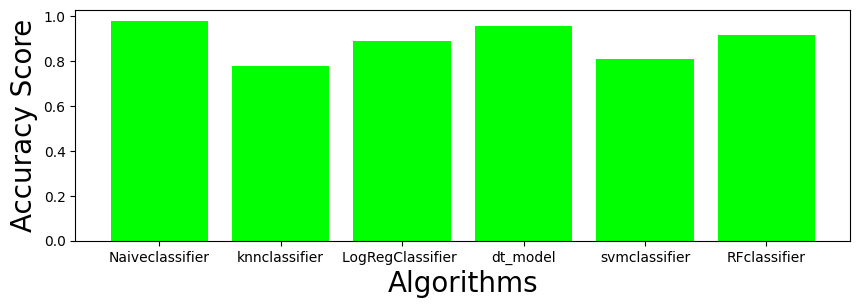

In [ ]:
plt.figure(figsize=(10, 3))
plt.bar(x=['Naiveclassifier','knnclassifier','LogRegClassifier ','dt_model','svmclassifier','RFclassifier'],height=[test_accuracy_svm,test_accuracy_knn,test_accuracy_Naive,test_accuracy_rf,test_accuracy_logreg,test_accuracy_dt],color='#00FF00')
plt.xlabel('Algorithms',fontsize=20)
plt.ylabel('Accuracy Score',fontsize=20)
plt.show()

#15.CROSS VALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import

# Random Forest
rf=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=5)
print(cross_val_score(rf,X,y,cv=10,scoring='accuracy').mean())

0.9166923472008218


In [ ]:
# Decision Tree
dt=DecisionTreeClassifier(max_depth=5,criterion='gini',max_features=6)
print(cross_val_score(dt,X,y,cv=10,scoring='accuracy').mean())

0.5940485362095532


In [ ]:
# Logistic Regression
logreg=LogisticRegression()
print(cross_val_score(logreg,X,y,cv=10,scoring='accuracy').mean())

0.799967899332306


In [ ]:
# Naive Bayes
Naiveclassifier=GaussianNB()
print(cross_val_score(Naiveclassifier,X,y,cv=10,scoring='accuracy').mean())

0.8782389573703131


In [ ]:
# KNN
knn=KNeighborsClassifier(n_neighbors=4)
print(cross_val_score(knn,X,y,cv=10,scoring='accuracy').mean())

0.8543143297380584


In [ ]:
#SVM
svmclassifier=SVC(kernel='rbf',max_iter=500)
print(cross_val_score(svmclassifier,X,y,cv=10,scoring='accuracy').mean())

0.9779179506933744
